In [8]:
import torch
import numpy as np
import PIL
import transformers
from transformers import CLIPTokenizer
from model_loader import load_pretaining_weights
import pipeline
from PIL import Image

C:\Users\zinov\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
from aiogram.dispatcher.filters.state import State, StatesGroup
import asyncio


class GenerationMode(StatesGroup):
    mode_1 = State()  # Режим 1: Prompt
    mode_2 = State()  # Режим 2: Prompt+Image
    mode_3 = State()  # Режим 3: Style Transfer Cyberpunk
    mode_4 = State()  # Режим 4: Style Transfer хз что
GenerationMode.mode_1

<State 'GenerationMode:mode_1'>

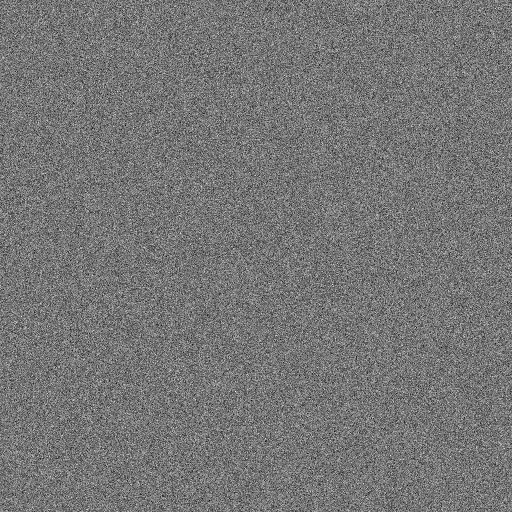

In [10]:
noise = np.random.normal(0, 1, (512, 512))
    
    # Нормализуем значения шума к диапазону [0, 255]
noise = (noise - np.min(noise)) / (np.max(noise) - np.min(noise)) * 255
    
    # Преобразуем значения в целые числа
noise = noise.astype(np.uint8)
    
    # Создаем изображение из массива numpy
image = Image.fromarray(noise)
image

In [40]:
#Load weights
tokenizer = CLIPTokenizer(r"C:\Users\zinov\StableDiff_scratch\data\tokenizer_vocab.json", merges_file=r"C:\Users\zinov\StableDiff_scratch\data\tokenizer_merges.txt")
models = load_pretaining_weights(r"C:\Users\zinov\Downloads\v1-5-pruned-emaonly.ckpt", 'cpu')

In [29]:
prompt = "man, student, nvinkpunk"
uncond_prompt=''
do_cfg = True
cfg_scale = 7  # min: 1, max: 14

In [36]:
input_image = None
# Comment to disable image to image
image_path = "data/Вадим_оопенгеймер.jpg"
input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.4

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [08:51<00:00, 22.14s/it]


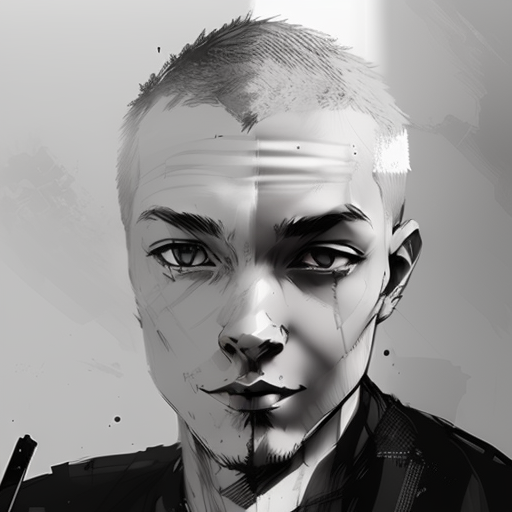

In [37]:
sampler = "ddpm"
num_inference_steps = 60
seed = 42
DEVICE = 'cpu'

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)

In [38]:
Image.fromarray(output_image).save('ДаниилВитальевич.jpg')

In [7]:
output_image.shape

NameError: name 'output_image' is not defined

In [9]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)